## Observable Trends
1. Ride share usage is heavily concentrated in urban areas: 68.4% of all rides.
2. This concentration could be a result of the location of drivers. Almost 81% of drivers work in urban areas, leaving only 3% in rural regions and 16% in suburbs.
3. Rides are significantly more expensive in rural areas, which is correlated with the low number of rides taken and low driver count.


### Pyber Instructions

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

#### Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

#### In addition, you will be expected to produce the following three pie charts:
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

#### As final considerations:
* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
* You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
* When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
* When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

### Setup

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")
#ride_df.head()
#city_df.head()

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on='city')
pyber_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


### Bubble Plot of Ride Sharing Data

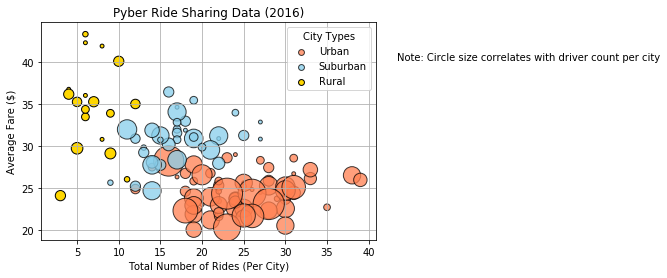

In [2]:
#identify the city types
#print(pyber_df["type"].unique())

#identify the scale that's shared between all 3 city types
grouped_pyber = pyber_df.groupby(["type","city"])
city_counts = pd.DataFrame(grouped_pyber["driver_count"].mean())

size = city_counts["driver_count"]


#separate data frames by city type
urban_type = pyber_df.loc[pyber_df["type"] == "Urban", :]
#urban_type

suburban_type = pyber_df.loc[pyber_df["type"] == "Suburban", :]
#suburban_type

rural_type = pyber_df.loc[pyber_df["type"] == "Rural", :]
#rural_type

#group each data frame by city name
urban_groups = urban_type.groupby(["city"])
suburban_groups = suburban_type.groupby(["city"])
rural_groups = rural_type.groupby(["city"])

#count rides by city name for each type and calculate average fare
urban_counts = pd.DataFrame(urban_groups["ride_id"].count())
urban_counts["avg_fare"] = urban_groups["fare"].mean()
#urban_counts

suburban_counts = pd.DataFrame(suburban_groups["ride_id"].count())
suburban_counts["avg_fare"] = suburban_groups["fare"].mean()
#suburban_counts

rural_counts = pd.DataFrame(rural_groups["ride_id"].count())
rural_counts["avg_fare"] = rural_groups["fare"].mean()
#rural_counts

#identify the x-values for each city type
urban_x = urban_counts["ride_id"]
suburban_x = suburban_counts["ride_id"]
rural_x = rural_counts["ride_id"]

#identify the y-values for each city type
urban_y = urban_counts["avg_fare"]
suburban_y = suburban_counts["avg_fare"]
rural_y = rural_counts["avg_fare"]


# Build the scatter plots for each city type
plt.scatter(urban_x, urban_y, s=size*15, facecolors="coral", alpha=0.75, edgecolor="black", label="Urban")
plt.scatter(suburban_x, suburban_y, s=size*15, facecolors="skyblue", alpha=0.75, edgecolor="black", label="Suburban")
plt.scatter(rural_x, rural_y, s=size*15, facecolors="gold", alpha=1, edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(title="City Types", markerscale=0.25, loc="best")

# Incorporate a text label regarding circle size
plt.figtext(0.95, 0.75, "Note: Circle size correlates with driver count per city")

# Save figure
plt.savefig("Pyber_Bubble_Plot.png")

# Show figure
plt.show()

### Total Fares by City Type

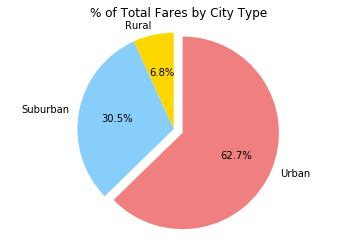

In [3]:
#sum the fares by city type
city_types = pyber_df.groupby(["type"])
total_fares_df = pd.DataFrame(city_types["fare"].sum())
#total_fares_df

#print(total_fares_df.index.values)
colors = ["gold", "lightskyblue", "lightcoral"]

#organize into pie chart
plt.pie(total_fares_df["fare"], labels=total_fares_df.index.values, colors=colors, explode=[0,0,0.1], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save figure
plt.savefig("Total_Fares_City_Type.png")

# Show figure
plt.show()

### Total Rides by City Type

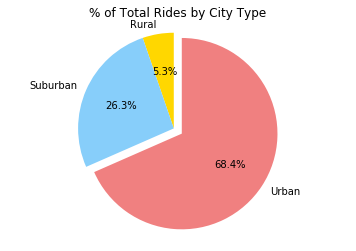

In [10]:
#count the rides by city type
total_rides_df = pd.DataFrame(city_types["ride_id"].count())
total_rides_df

#print(total_rides_df.index.values)
colors = ["gold", "lightskyblue", "lightcoral"]

#organize into pie chart
plt.pie(total_rides_df["ride_id"], labels=total_rides_df.index.values, colors=colors, explode=[0,0,0.1], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save figure
plt.savefig("Total_Rides_City_Type.png")

# Show figure
plt.show()

### Total Drivers by City Type

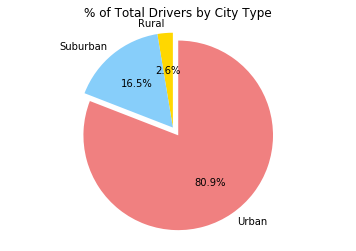

In [21]:
#count the rides by city type
city_df
grouped_cities = city_df.groupby(["type"])
total_drivers_df = pd.DataFrame(grouped_cities["driver_count"].sum())
total_drivers_df

#print(total_drivers_df.index.values)
colors = ["gold", "lightskyblue", "lightcoral"]

#organize into pie chart
plt.pie(total_drivers_df["driver_count"], labels=total_drivers_df.index.values, colors=colors, explode=[0,0,0.1], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save figure
plt.savefig("Total_Drivers_City_Type.png")

# Show figure
plt.show()